In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Consider  the  dataset  'weatherAUS'  called  Rain  in  Australia.  It  describes  the  weather characteristics on different dates and locations. This dataset contains about 10 years of daily weather observations from many locations across Australia.

In [32]:
weather = pd.read_csv("weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 1. Preprocess the data, remove the attributes which were are not useful to predict rain. Also, remove rows with at least one missing value for each of them. 

In [33]:
weather.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [34]:
#converting RainToday and RainTomorrow to Binary

weather['RainToday'] = weather['RainToday'].map({'No':0, 'Yes':1}) 
weather['RainTomorrow'] = weather['RainTomorrow'].map({'No':0, 'Yes': 1})

In [35]:
weather['Date'] = pd.to_datetime(weather['Date']).dt.month
weather.rename(columns={'Date':'Month'}, inplace=True)
#extracting month from date

In [36]:
# encoding categorical variables
le = LabelEncoder()
weather["Location"] = le.fit_transform(weather["Location"])
weather["WindDir9am"]= le.fit_transform(weather["WindDir9am"])
weather["WindDir3pm"]= le.fit_transform(weather["WindDir3pm"])
weather["WindGustDir"] = le.fit_transform(weather["WindGustDir"])

In [37]:
#droping missing values
weather.dropna(inplace=True)

In [38]:
# finding correlation between variables

corr = weather.corr()
corr

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Month,1.000000,-0.010266,-0.188585,-0.160479,-0.033842,-0.043739,0.030388,0.030909,0.046115,0.001253,...,-0.092797,-0.026029,0.057797,0.046501,-0.007072,-0.011004,-0.123706,-0.168273,0.002718,0.001538
Location,-0.010266,1.000000,-0.144692,-0.147238,-0.041701,-0.013793,-0.035438,0.102115,0.070911,-0.030387,...,0.114045,0.036701,0.091551,0.124799,0.020298,0.009784,-0.187705,-0.148843,-0.004472,-0.005333
MinTemp,-0.188585,-0.144692,1.000000,0.749940,0.115248,0.509595,0.075757,-0.183659,0.133227,-0.085062,...,-0.182607,0.072295,-0.484207,-0.502151,0.110464,0.048385,0.907218,0.727223,0.056681,0.094370
MaxTemp,-0.160479,-0.147238,0.749940,1.000000,-0.065842,0.653135,0.464779,-0.240035,0.050740,-0.249139,...,-0.500402,-0.447072,-0.359565,-0.457682,-0.261455,-0.255090,0.893347,0.984951,-0.215914,-0.142176
Rainfall,-0.033842,-0.041701,0.115248,-0.065842,1.000000,-0.073939,-0.243855,0.067013,0.105338,0.090469,...,0.258623,0.276014,-0.181581,-0.138991,0.216056,0.190335,0.018608,-0.070529,0.550570,0.254027
Evaporation,-0.043739,-0.013793,0.509595,0.653135,-0.073939,1.000000,0.370672,-0.103692,0.221870,-0.147122,...,-0.557311,-0.420953,-0.304457,-0.332007,-0.198025,-0.200114,0.596197,0.632936,-0.212446,-0.125401
Sunshine,0.030388,-0.035438,0.075757,0.464779,-0.243855,0.370672,1.000000,-0.087280,-0.039792,-0.114729,...,-0.502676,-0.631821,0.038282,-0.024316,-0.679471,-0.703190,0.289032,0.486942,-0.327002,-0.451169
WindGustDir,0.030909,0.102115,-0.183659,-0.240035,0.067013,-0.103692,-0.087280,1.000000,0.116465,0.407166,...,0.096260,0.054781,-0.117995,-0.023222,0.079183,0.079609,-0.227166,-0.254442,0.147341,0.060505
WindGustSpeed,0.046115,0.070911,0.133227,0.050740,0.105338,0.221870,-0.039792,0.116465,1.000000,-0.014359,...,-0.206888,-0.049110,-0.433983,-0.388055,0.082489,0.126352,0.102483,0.014473,0.144309,0.231058
WindDir9am,0.001253,-0.030387,-0.085062,-0.249139,0.090469,-0.147122,-0.114729,0.407166,-0.014359,1.000000,...,0.183347,0.183132,-0.011377,0.075522,0.109872,0.063237,-0.169259,-0.254013,0.166162,0.028554


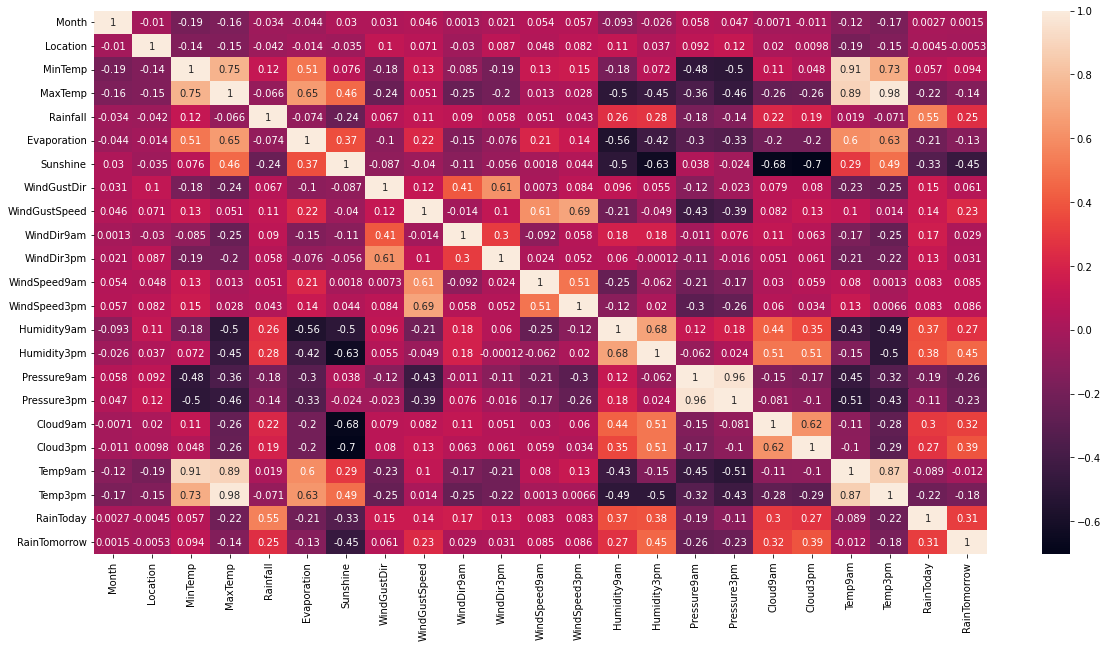

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

In [40]:
weather.drop(['Month','Location'], axis=1, inplace=True)

In [41]:
# splitting into predictor and predicted attributes
X = weather.drop('RainTomorrow', axis=1)
Y = weather['RainTomorrow']

# train-test-split (80,20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# fitting a logistic regression model
clf = LogisticRegression(max_iter=10000).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# checking the accuracy of the model
score = accuracy_score(Y_test, Y_pred)
print("Accuracy Score = ",score)

Accuracy Score =  0.8466173179548976


In [42]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      9059
         1.0       0.71      0.52      0.60      2559

    accuracy                           0.85     11618
   macro avg       0.79      0.73      0.75     11618
weighted avg       0.84      0.85      0.84     11618



## 2. Calculate  the  Variance  Inflation  Factor  (VIF)  value.  VIF  is  a  number  that determines whether a variable has multicollinearity or not (starts from 1, and it has  no  upper  limit.  If  the  number  gets  larger,  it  means  the  variable  has  huge multicollinearity on it.). 

In [43]:
vifvals = pd.DataFrame()
vifvals['VIF'] = [variance_inflation_factor(weather.values, i) for i in range(weather.shape[1])]
vifvals['Column'] = weather.columns
vifvals.sort_values('VIF', ascending=False)

,VIF,Column
13,494684.783777,Pressure9am
14,494422.296320,Pressure3pm
18,676.647893,Temp3pm
1,615.083500,MaxTemp
17,209.016940,Temp9am
11,61.695304,Humidity9am
0,58.973479,MinTemp
12,50.256350,Humidity3pm
6,28.430175,WindGustSpeed
4,17.789919,Sunshine


## 3. Remove multicollinearities by creating new features. Find the features that have paired values and create the new feature which is the difference value between those pairs.

In [44]:
weather['TempDiff'] = weather['Temp3pm'] - weather['Temp9am']
weather['HumidityDiff'] = weather['Humidity3pm'] - weather['Humidity9am']
weather['WindSpeedDiff'] = weather['WindSpeed3pm'] - weather['WindSpeed9am']
weather['PressureDiff'] = weather['Pressure3pm'] - weather['Pressure9am']
weather['CloudDiff'] = weather['Cloud3pm'] - weather['Cloud9am']
weather['WindDirDiff'] = weather['WindDir3pm'] - weather['WindDir9am']

# dropping original features
weather.drop(['Temp3pm', 'Temp9am', 'Humidity3pm', 'Humidity9am', 'WindSpeed3pm', 
         'WindSpeed9am', 'Pressure3pm', 'Pressure9am',
         'Cloud3pm', 'Cloud9am', 'WindDir3pm', 'WindDir9am'], axis=1, inplace=True)

In [45]:
vifvals = pd.DataFrame()
vifvals['VIF'] = [variance_inflation_factor(weather.values, i) for i in range(weather.shape[1])]
vifvals['Column'] = weather.columns
vifvals.sort_values('VIF', ascending=False)

,VIF,Column
1,95.014767,MaxTemp
0,36.378712,MinTemp
9,14.637029,TempDiff
4,9.937572,Sunshine
6,9.322397,WindGustSpeed
3,6.168165,Evaporation
10,5.801730,HumidityDiff
12,4.159773,PressureDiff
5,3.616783,WindGustDir
7,2.189030,RainToday


## 4. Remove features that have a VIF value above 5.

In [46]:
# dropping features with VIF > 5
weather.drop(['MaxTemp', 'MinTemp', 'TempDiff', 'WindGustSpeed', 'RainTomorrow'], axis=1, inplace=True)

# final features
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(weather.values, i) for i in range(weather.shape[1])]
vif_info['Column'] = weather.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,6.112535,Sunshine
1,3.600367,Evaporation
3,2.838149,WindGustDir
7,2.707657,PressureDiff
5,2.438259,HumidityDiff
4,1.870148,RainToday
0,1.588344,Rainfall
6,1.299905,WindSpeedDiff
9,1.053177,WindDirDiff
8,1.027798,CloudDiff


## 5. Build a regression model to perform the Rain prediction. Also, tabulate accuracy of the prediction models, before and VIF computation.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(weather, Y, test_size=0.2, random_state=0)

# fitting a logistic regression model
clf = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

# checking the accuracy of the model
accuracy_score(Y_test, Y_pred)

0.8341366844551558

In [48]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      9069
         1.0       0.69      0.44      0.54      2549

    accuracy                           0.83     11618
   macro avg       0.77      0.69      0.72     11618
weighted avg       0.82      0.83      0.82     11618

